In [20]:
"""
Objectives:

1. Define a more complex AgentState
2. Create a processing node that performs operations on list data.
3. Set up a LangGraph that processes and outputs computed results.
4. Invoke the graph with structured inputs and retrieve outputs.

Main Goal: Learn how to handle multiple inputs.
Create a graph where you pass in a single list of integers along with a name and an operation.
If the operation is a "+", you add the elements and if it is a "*", you multiply the elements, all within the same node.

Input: {"name": Jack Sparrow, "values": [1,2,3,4], "operation": "*"}
Output: "Hi Jack Sparrow, your answer is: 24"
"""

'\nObjectives:\n\n1. Define a more complex AgentState\n2. Create a processing node that performs operations on list data.\n3. Set up a LangGraph that processes and outputs computed results.\n4. Invoke the graph with structured inputs and retrieve outputs.\n\nMain Goal: Learn how to handle multiple inputs. \nCreate a graph where you pass in a single list of integers along with a name and an operation.\nIf the operation is a "+", you add the elements and if it is a "*", you multiply the elements, all within the same node.\n\nInput: {"name": Jack Sparrow, "values": [1,2,3,4], "operation": "*"}\nOutput: "Hi Jack Sparrow, your answer is: 24"\n'

In [21]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [22]:
class AgentState(TypedDict):
  name: str
  values: List[int]
  operation: str
  result: str

In [23]:
import math

In [29]:
def calculator_node(state: AgentState) -> AgentState:
  """ A simple calculator node that handles multiple different inputs (name, values, operation)"""
  print(state)
  if state['operation'] == "*":
    state['result']= "Hi, " + state['name'] + ", your answer is: " + str(math.prod(state['values']))

  if state['operation'] == "+":
    state['result'] = "Hi, " + state['name'] + ", your answer is: " + str(sum(state['values']))
  print(state)
  return state

In [30]:
graph = StateGraph(AgentState)

graph.add_node("calculator", calculator_node)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")

app = graph.compile()

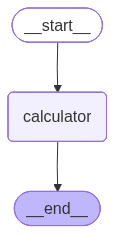

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
answers = app.invoke({"name": "Jack Sparrow", "values": [1,2,3,4], "operation": "*"})

{'name': 'Jack Sparrow', 'values': [1, 2, 3, 4], 'operation': '*'}
{'name': 'Jack Sparrow', 'values': [1, 2, 3, 4], 'operation': '*', 'result': 'Hi, Jack Sparrow, your answer is: 24'}


In [33]:
answers = app.invoke({"name": "Jack Sparrow", "values": [1,2,3,4], "operation": "+"})

{'name': 'Jack Sparrow', 'values': [1, 2, 3, 4], 'operation': '+'}
{'name': 'Jack Sparrow', 'values': [1, 2, 3, 4], 'operation': '+', 'result': 'Hi, Jack Sparrow, your answer is: 10'}
